# IMEC2201 Herramientas Computacionales 
## Taller Semana 4: Raíces de Ecuaciones - Factor de Fricción de Darcy
### Fecha Límite Entrega (Bloque Neón): <font color="#FF5733">23.59h de Mayo 6, 2022</font>

Universidad de los Andes — Abril 27, 2022.
___
### Tener en Cuenta
La entrega del Taller 4 se puede realizar de tres maneras:
1. Cargar la solución en su repositorio en GitHub y enviar el enlace del mismo vía Bloque Neón.
2. Enviar vía Bloque Neón el archivo en Jupyter Notebook (extensión '.ipynb').
3. Enviar vía Bloque Neón el archivo PDF del Jupyter Notebook.
___


# Semana 4: Solución de Ecuaciones no Lineales

Esta semana se van a mostrar diferentes casos de soluciones de ecuaciones no lineales. En problemas de ingeniería, es importante conocer las diferentes herramientas que permiten solucionar ecuaciones que en el papel, pueden ser complejas o incluso imposibles de solucionar. 

Este módulo trabajará con el paquete `NLsolve.jl`, el cual se utiliza para resolver ecuaciones no lineales y también sistemas de ecuaciones no lineales. A continuación se explicará el procedimiento a seguir tanto para una ecuación como para un sistema de dos ecuaciones. Finalmente, se va a dejar un ejercicio práctico para el taller de esta semana.

## Instalación del paquete

De nuevo, este proceso se puede realizar mediante la consola de Julia de cualquiera de ambas maneras:


* ``] add NLsolve``

* ``using Pkg; Pkg.add("NLsolve")``

## Ejemplo con una ecuación no lineal

En este ejemplo se va a solucionar la siguiente ecuación:

$$ \sin^2{(x - 3)} = \cos{(2x)}$$

Para solucionar las ecuación, se debe tener la expresión igualada a cero.

Primero, se importa el paquete.

In [1]:
using NLsolve

Se declara una función de esta manera, en la que el primer argumento es el vector de soluciones a cero y el segundo, el número de variables a resolver. En este caso, se usa ``x[1]`` porque sólo es una variable a resolver. 

In [2]:
function f!(F,x) # importante poner un "!" al final del nombre de la ecuacion 
    F[1] = sin(x[1]-3)^2 - cos(2x[1]) # ecuación igualada a cero
end # Es recomendable no usar un "return"

f! (generic function with 1 method)

Posteriormente, se declara el objeto solución usando la función ``nlsolve(eq,guess)`` donde los parámetros corresponden a la ecuación a resolver y un vector con los puntos iniciales de los cuales se empieza a iterar para buscar una solución. Es importante tener en cuenta la forma de la función a resolver, ya que si tiene más de una raíz, es recomendable usar diferentes puntos de partida para iteración.  

In [3]:
sol = nlsolve(f!, [1.0])

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [1.0]
 * Zero: [0.5668366475637803]
 * Inf-norm of residuals: 0.000000
 * Iterations: 4
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-08: true
 * Function Calls (f): 5
 * Jacobian Calls (df/dx): 5

Como se puede notar, el objeto solución tiene diferentes atributos, donde los que más tienen importancia son la convergencia y el cero. La convergencia es un booleano que confirma si se logró encontrar una solución, mientras que el cero es la solución que se encontro para cada ecuación. 

In [4]:
# Convergencia de la solución
sol.f_converged

true

In [5]:
# Solución de la ecuación
sol.zero

1-element Vector{Float64}:
 0.5668366475637803

Nótese que el campo `sol.zero` es un vector, ya que en el caso de tener más de una ecuación se tendrían diferentes entradas.

## Ejemplo con dos ecuaciones y dos variables

En este caso se va a resolver el siguiente sistema:

$$ (x_1 + 3)\times (x_2^3 - 7) = -18 $$

$$ \sin{(x_2 e^{x_1} - 1)} = 0 $$

In [6]:
# Se declara la función:

function f!(F, x)
    F[1] = (x[1]+3)*(x[2]^3-7)+18 # El ultimo termino es +18 porque está igualado a cero
    F[2] = sin(x[2]*exp(x[1])-1)
end

#Resolución del problema

sol = nlsolve(f!, [ 0.1; 1.2])

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.1, 1.2]
 * Zero: [-7.775548712324193e-17, 0.9999999999999999]
 * Inf-norm of residuals: 0.000000
 * Iterations: 4
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-08: true
 * Function Calls (f): 5
 * Jacobian Calls (df/dx): 5

In [7]:
sol.zero

2-element Vector{Float64}:
 -7.775548712324193e-17
  0.9999999999999999

Como se puede notar, los ceros del sistema de ecuaciones no lineales son un vector.

## Solucion de ecuaciones no lineales con el paquete `Roots.jl`

Algunas veces se pueden encontrar diferentes errores con algoritmos sofisticados, y en ocasiones lo mejor es aproximar la ecuación a una fuinción y encontrar la raiz, tal como se realizó cuando se solucionaron las ecuaciones usando `nlsolve()`. El paquete `Roots.jl` puede realizar este procedimiento de una manera un poco más sencilla, usando la función `findzero(f, args..)` donde toma como parámetros la función y argumentos especiales para la resolución de la ecuación. Uno de los métodos más efectivos es el metodo de la bisección (usado por defecto), el cual busca una solución en el intervalo entre dos números. Para más información de este paquete se puede revisar la documentación en https://github.com/JuliaMath/Roots.jl. A continuación se va a realizar un ejemplo:

In [8]:
using Roots
eq(x) = exp(x) - x^4
sol = find_zero(eq, (-1,1))
# Evaluar la funcion en la solucion
eq(sol)

-1.1102230246251565e-16

# Taller 

En este caso, se va aplicar el método de solucion de ecuaciones no lineales en un problema de mecánica de fluidos. Cuando se estudian casos de flujo interno (por ejemplo, tuberías y sistemas de bombeo) es importante tener en cuenta los valores de las pérdidas en la presión a causa de la fricción. Esta información pasa a ser relevante en los casos de diseño de sistemas y selección de equipos de bombeo. Esta pérdida puede ser expresada en términos de una cabeza $h_f$, cuya dimensión son unidades de longitud, y puede interpretarse como una distancia máxima que se está perdiendo a causa de la fricción. Se define esta cabeza de pérdidas como:

$$ h_f = f \frac{l}{d} \frac{V^2}{2g} $$

Donde $f$ es el factor de fricción, una cantidad adimensional que es función de la rugosidad relativa y de las variables dinámicas del sistema. Las cantidades $l$ y $d$ son respectivamente la longitud y el diámetro de la tubería y $V$ es la velocidad del fluido. 

## Factor de fricción

Como mencionado anteriormente, el factor de fricción es un importante parámetro adimensional que depende de la rugosidad relativa de la tubería y del número de Reynolds $Re$. Este número relaciona las fuerzas por viscosidad con la inercia cinemática del flujo. Se define como:

$$ Re = \frac{V d}{\nu} $$

Donde $V$ es la velocidad del flujo, $d$ el diámetro de la tubería y $\nu$ es la viscosidad cinemática del fluido. 

Los flujos se pueden clasificar de dos maneras, flujo turbulento y flujo laminar. El primero hace referencia a flujos desordenados donde la distrubución de presión y velocidades no son fáciles de modelar, y el segundo trata de líneas de corriente suaves, con distribuciones de presión un poco más uniformes. La clasificación de flujos laminares y turbulentos para flujos internos se puede encontrar con el número de Reynolds:

* Laminar si $Re \leq 2300$

* Turbulento si $Re > 2300$

El factor de fricción para flujos laminares se encuentra con la siguiente expresión:

$$f_{lam} = \frac{64}{Re}$$

En cambio, para flujos turbulentos se tiene una ecuación no lineal, que debe ser encontrada con métodos iterativos, o con métodos computacionales. Esta ecuación se llama la ecuación de Colebrook:

$$\frac{1}{\sqrt{f}} = -2 \log_{10}{\bigg( \frac{\epsilon/d}{3.7} + \frac{2.51}{Re \sqrt{f}}\bigg)}$$

## Resultados a entregar

Para esta semana, se requiere realizar una gráfica que muestre cómo varía la cabeza de pérdidas de una tubería _lisa_, una de una rugosidad relativa de 0.01 y otra 0.02, todas con 10m de longitud con diámetros entre 10 y 20 centímetros, para una bomba que entrega un caudal de agua de $0.02 m^3/s$. Utilizar el valor de viscosidad cinemática del agua a 20 °C: $1.0035\times 10 ^{-6} m^2/s$

Recordar que el caudal se define como:

$$ Q = VA$$

Donde $V$ es la velocidad del fluido y $A$ es el área transversal de la tubería. 

**Nota**: Se recomienda verificar si el flujo es laminar o turbulento con el fin de usar la ecuación correcta de resolución para el factor de fricción. 

Se puede verificar el valor del factor de fricción encontrado usando el Diagrama de Moody, una gráfica que relaciona el número de reynolds con la rugosidad relativa y el factor de fricción:

<img src="Imagenes Semana 4/Moody.png" />

In [9]:
using Plots
function cabeza_perdidas()
    # Escribir el código aquí
    diametros = [i/100 for i in LinRange(10,20,10)]
    l = 10
    Q = 0.02
    nu = 1.0035e-6
    vel(d) = Q/(π/4*d^2)
    reynolds(d) = vel(d)*d/nu
    function f_solver(d,ϵ)
        Re = reynolds(d)
        func(x) = 1/sqrt(x) + 2*log10( (ϵ/d)/3.7 + 2.51/(Re*sqrt(x)) )
        f = find_zero(func,(0,1))
        return (f)
    end
    function hf(d,ϵ)
        g = 9.81
        Re = reynolds(d)
        f = f_solver(d,ϵ)
        v = vel(d)
        h = f * (l/d) * v^2 *1/2g
        return (h)
    end
    # Para la lisa
    h_lisa = []
    # Para la de 0.01
    h_1 = []
    # Para la de 0.02
    h_2 = []
    for di in diametros
        append!(h_lisa,hf(di,0))
        append!(h_1,hf(di,0.01))
        append!(h_2,hf(di,0.02))
    end
    # Gráficas
    plot(diametros*100,h_lisa, label = "Tuberia lisa")
    plot!(diametros*100,h_1,label = "ϵ = 0.01")
    plot!(diametros*100,h_2,label = "ϵ = 0.02")
    title!("Cabezas de perdida para diferentes rugosidades")
    xlabel!("Diámetros [cm]")
    ylabel!("Cabezas de pérdidas [m]")
end

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1423


cabeza_perdidas (generic function with 1 method)

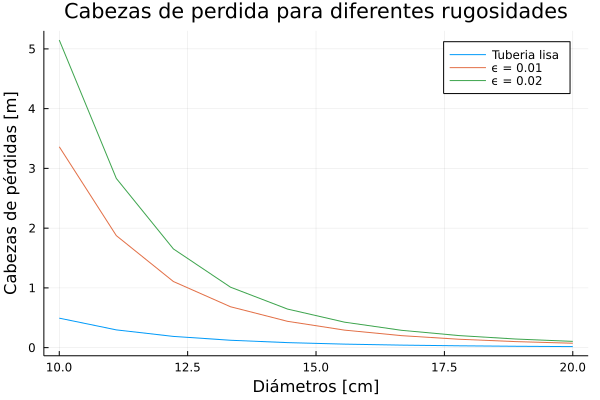

In [10]:
cabeza_perdidas()